<a href="https://colab.research.google.com/github/s4hlo/notebooks/blob/main/aula07___dados_biologicos2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicando dados de sequência aos Métodos de Aprendizado de Máquina

---



**Por: Prof. Dr. Tetsu Sakamoto (IMD/UFRN)**


---
## Introdução

A maioria dos métodos de aprendizagem de máquina são aplicáveis para variáveis (atributos) sejam do tipo quantitativo (numérico). No entanto, a maior parte dos dados biológicos gerados nos últimos anos são os resultados dos sequenciadores de DNA, portanto sequências de caracteres constituídos de A, T, C e G.

Então como podemos aplicar os métodos de aprendizagem de máquina em dados desse tipo?

O objetivo deste roteiro é apresentar algumas estratégias que transformam dados de sequenciamento em dados numéricos.


### K-mers

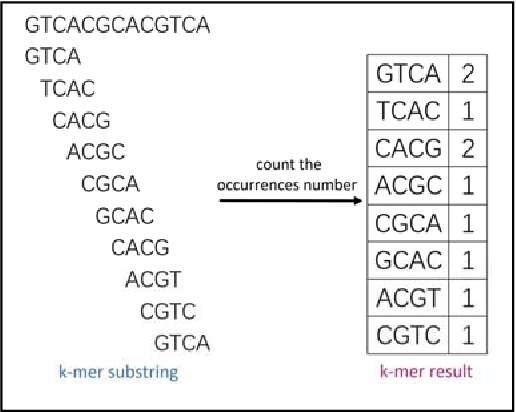

Fonte: https://www.semanticscholar.org/paper/K-mer-Counting%3A-memory-efficient-strategy%2C-parallel-Xiao-Li/02563dbd80c0a157cbf7202f31be3b2db391457b

In [ ]:
# Função para gerar os k-mers de uma sequência
def build_kmers(sequence, ksize):
    kmers = {}
    n_kmers = len(sequence) - ksize + 1

    for i in range(n_kmers):
        kmer = sequence[i:i + ksize]
        if kmer not in kmers:
          kmers[kmer] = 1
        else:
          kmers[kmer] += 1

    return kmers

build_kmers('ATGGACCAGATATAGGGAGAGCCAGGTAGGACA', 21)

In [ ]:
seq1 = 'ATGGACCAGATATAGGGAGAGCCAGGTAGGACA'
seq2 = 'ATGGACCAGATATTGGGAGAGCCGGGTAGGACA'
# differenças:       ^         ^

In [ ]:
# executando a função para criar os kmers na forma de dicionário
K = 10
kmers1 = build_kmers(seq1, K)
kmers2 = build_kmers(seq2, K)
print(kmers1)
print(kmers2)

In [ ]:
# colocando os dados do kmer na forma de uma dataframe
dkmers1 = pd.DataFrame(list(kmers1.items()), columns=["kmer", "count1"])
dkmers1.set_index("kmer", inplace=True)

dkmers2 = pd.DataFrame(list(kmers2.items()), columns=["kmer", "count2"])
dkmers2.set_index("kmer", inplace=True)
print(dkmers1.head())
print(dkmers2.head())

In [ ]:
# concatenando os dados de kmers das duas sequências
kmer_matrix = pd.concat([dkmers1,dkmers2], axis = 1, join="outer")
kmer_matrix

In [ ]:
# preenchendo os dados faltantes por 0
kmer_matrix = kmer_matrix.fillna(0)
kmer_matrix

In [ ]:
# transpondo a tabela
kmer_matrix = kmer_matrix.transpose()
kmer_matrix

## One hot encoding

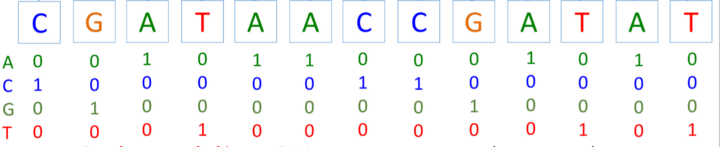

Fonte: https://elferachid.medium.com/one-hot-encoding-dna-92a1c29ba15a

In [ ]:
seq = [ "tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc",
        "tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa",
        "gtactagagaactagtgcattagcttatttttttgttatcatgcta",
        "aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata",
        "tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc"]

In [ ]:
len(seq)

In [ ]:
# criando uma dataframe com as dimensões correspondentes ao número de sequência x tamanho da sequência;
nucleotide_sequence = pd.DataFrame(np.random.randn(len(seq),len(seq[0])), dtype="object")
nucleotide_sequence

In [ ]:
# preenchendo a dataframe com os dados de sequência
for i in range(len(seq)):
  nucleotide_sequence.loc[i] = list(seq[i])
nucleotide_sequence

In [ ]:
# aplicando o one-hot encoding
numerical_nucleotide = pd.get_dummies(nucleotide_sequence)
numerical_nucleotide

## Referências

Kmers

* https://sourmash.readthedocs.io/en/latest/kmers-and-minhash.html

One hot encoder:
* https://datagy.io/python-support-vector-machines/
* https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
* https://datavalley.technology/dna-sequencing-with-machine-learning/
* https://2-bitbio.com/2018/06/one-hot-encode-dna-sequence-using.html
* https://medium.datadriveninvestor.com/machine-learning-in-bioinformatics-d81b1b3eaba2

## Exercício

Neste [link](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+(Promoter+Gene+Sequences)) você encontrará dados de sequências de DNA na região 50 upstream e +7 downstream de vários genes. Algumas delas são promotores, ou seja, regiões onde a RNA polimerase se liga para realizar a transcrição de um gene (+) e outras não (-). Utilize as abordagens vistas nesta aula e gere um classificador baseado nestes dados. Você pode utilizar os métodos de seleção de atributos e ajuste de hiperparâmetros para encontrar modelos com melhores performances.

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
columns = ['Class','id','Sequence'] # Nomeando as colunas
genes = pd.read_csv(url,names = columns) # lendo os dados

In [ ]:
genes

In [ ]:
genes.shape # imprimir as dimensões da tabela

In [ ]:
genes.nunique() # imprimir o númer de valores únicos em cada coluna

In [ ]:
# removendo ‘\t’ na coluna ‘Sequence’
for i in range(genes.shape[0]):
 genes['Sequence'][i] = genes['Sequence'][i].replace('\t', '')

In [ ]:
genes.head
